# Householder QR

### References

* Lawson, C. L,. and Hanson, R. J. (1995). Solving least squares problems. SIAM, ISBN 0-89871-356-0

* Golub, G. H. and C. F. Van Loan, (2013), Matrix computations, 4th edition, Johns Hopkins University Press, ISBN 978-1-4214-0794-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matcomp import plot_functions as plf
from matcomp import algorithms as mca
np.set_printoptions(precision=3)
#np.set_printoptions(suppress=True)

### Definition

Let $\mathbf{A}$ be an $M \times N$ real matrix, with $M \ge N$ and full column rank. In this case, $\mathbf{A}$ admits the unique factorization (Golub and Van Loan, 2013, p. 248):

<a id='eq1'></a>
$$
\mathbf{A} = \mathbf{Q} \, \mathbf{R} \quad , \tag{1}
$$

where $\mathbf{Q}$ is a real $M \times M$ orthogonal matrix and $\mathbf{R}$ is a real $M \times N$ upper triangular matrix with positive diagonal entries. Moreover, $\mathbf{R} = \mathbf{G}^{\top}$, where $\mathbf{G}$ is the lower triangular Cholesky factor of $\mathbf{A}^{\top}\mathbf{A}$. This factorization is called **thin QR decomposition**.

The present notebook illustrates how to use the Householder transformation (see the notebook [`Householder_transformation`](https://github.com/birocoles/Matrix-Computations/blob/main/code/Householder_transformation.ipynb)) for computing the QR decomposition (equation [1](#1)).

### Create a matrix $\mathbf{A}$

In [3]:
np.random.seed(18)
M = 7
N = 7

In [4]:
A = np.random.rand(M,N)

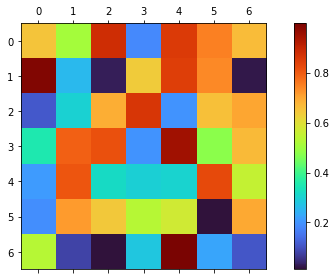

In [5]:
plf.plot_matrices(matrices=[A], size=(8,4), tol=1e-15, shape=(1,1))

### Compute the QR factorization of matrix $\mathbf{A}$ 

The Householder transformation is an efficient way of introducing zeros in vectors or matrices (see the notebook [`Householder_transformation`](https://github.com/birocoles/Matrix-Computations/blob/main/code/Householder_transformation.ipynb)). The following cells illustrate how to apply successive Householder transformations to $\mathbf{A}$, so that:

<a id='eq2'></a>
$$
\mathbf{R} = \underbrace{\left( \mathbf{H}_{(N-2)} \, \cdots \, \mathbf{H}_{(0)} \right)}_{\mathbf{Q}^{\top}} \:\: \mathbf{A} \quad , \tag{2}
$$

where

<a id='eq3'></a>
$$
\mathbf{H}_{(j)} = 
\begin{cases}
\mathbf{P}_{M \, \times \, M} &, \quad j = 0 \\
\begin{bmatrix} 
\mathbf{I}_{j \, \times \, j} & \mathbf{0}_{M-j \, \times \, M-j} \\
\mathbf{0}_{M-j \, \times \, M-j} & \mathbf{P}_{M-j \, \times \, M-j}
\end{bmatrix}_{M \times M} &, \quad j = 1, \dots, N-2 
\end{cases} \quad,  \tag{3}
$$

$\mathbf{P}$ is the Householder transformation computed with $\mathbf{A}[\, j: \, , \, j \, ]$, $\mathbf{I}_{j \, \times \, j}$ is the identity of order $j$ and $\mathbf{0}_{M-j \, \times \, M-j}$ is a matrix of zeros.

#### Compute the successive products

In [6]:
v = []
beta = []
H = []
P = [A]
R = A.copy()
for j in range(N):
    
    # Compute the Householder vector and parameter beta
    # by using the jth column of A
    vj, betaj = mca.House_vector(R[j:,j])
    
    v.append(vj)
    beta.append(betaj)
    
    # Create the Householder transformation
    Hj = np.identity(M)
    Hj[j:,j:] -= betaj*np.outer(vj,vj)

    H.append(Hj)

    # Compute the product
    R = Hj@R

    P.append(R)

In [7]:
# The list of Householder transformations H contains H0, H1, ..., HN-1
# Matrix Q is defined as the transpose of the product HN-1 HN-2 ... H0
Q = np.linalg.multi_dot(H[::-1]).T

In [8]:
# The computed Q and R matrices retrieve the original matrix A
np.allclose(A, Q@R)

True

In [9]:
# Matrix R contains the lower triangular Cholesky factor of ATA
np.allclose(A.T@A, R.T@R)

True

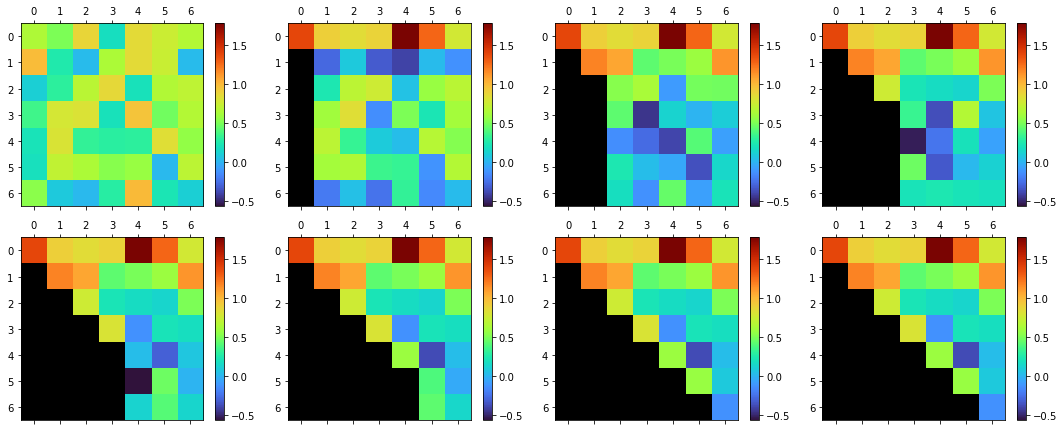

In [10]:
plf.plot_matrices(matrices=P, size=(15,12), tol=1e-15, shape=(4,4))

In [11]:
# The iterative scheme presented above is
# implemented in function mca.QR_House
R2 = A.copy()
mca.QR_House(R2)

In [12]:
# Function mca.QR_House stores the Householder vectors in the lower triangle 
# of the factored matrix. Function mca.Q_from_QR_House uses the stored Householder
# vector to compute the matrix Q
Q2 = mca.Q_from_QR_House(R2)

In [13]:
# Remove the lower triangle containing the 
# Householder verctors and keep only upper triangle
R2 = np.triu(R2)

In [14]:
# The computed Q2 and R2 matrices also retrieve the original matrix A
np.allclose(A, Q2@R2)

True

In [15]:
# Matrices Q and Q2 are the same
np.allclose(Q, Q2)

True

In [16]:
# Matrices R and R2 are the same
np.allclose(R, R2)

True

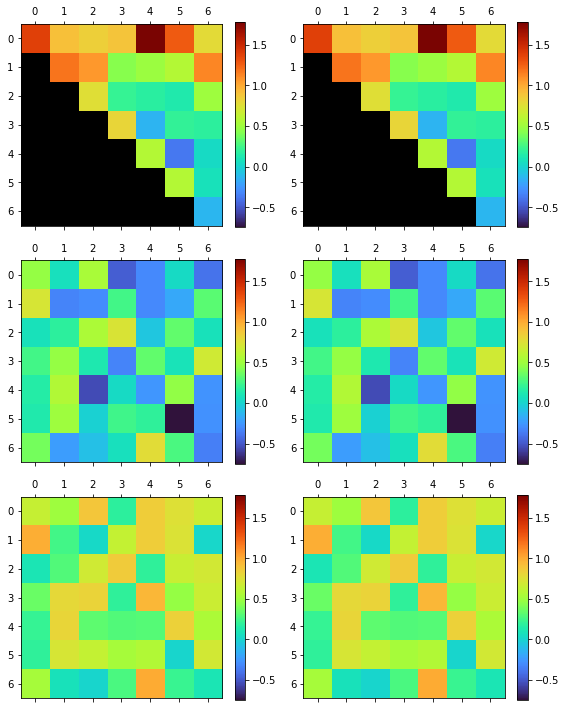

In [17]:
plf.plot_matrices(matrices=[R, R2, Q, Q2, A, Q2@R2], size=(8,10), tol=1e-15, shape=(3,2))